In [ ]:
%load_ext autoreload
%autoreload 2
import drawsvg as draw
import tensorcraft as tc
import torch

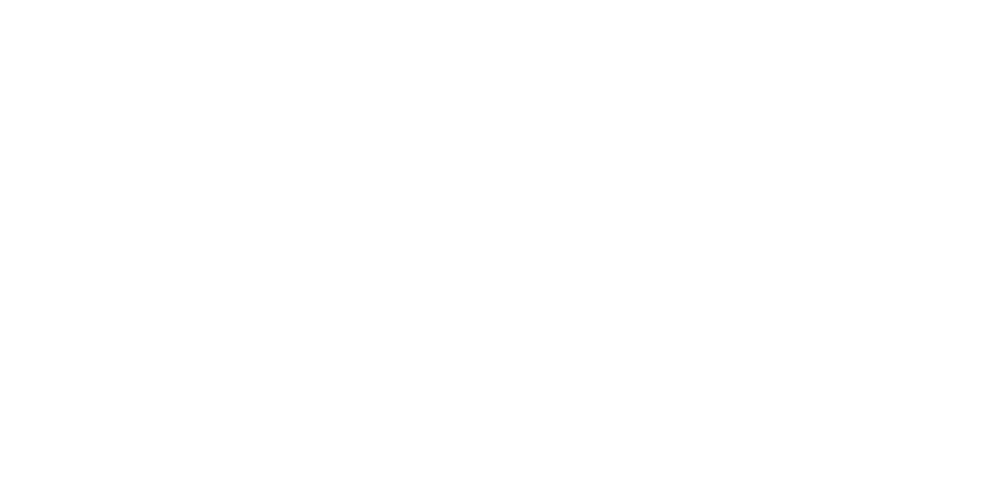

In [ ]:
scalar_tensor = torch.Size((2,2,2))
d = draw.Drawing(200, 100, origin='center')
tc.viz.draw_tensor(d, scalar_tensor, cell_size=5, mindex_highlight=(None, 1, None), highlight_color='red')
d.set_pixel_scale(5)  
d

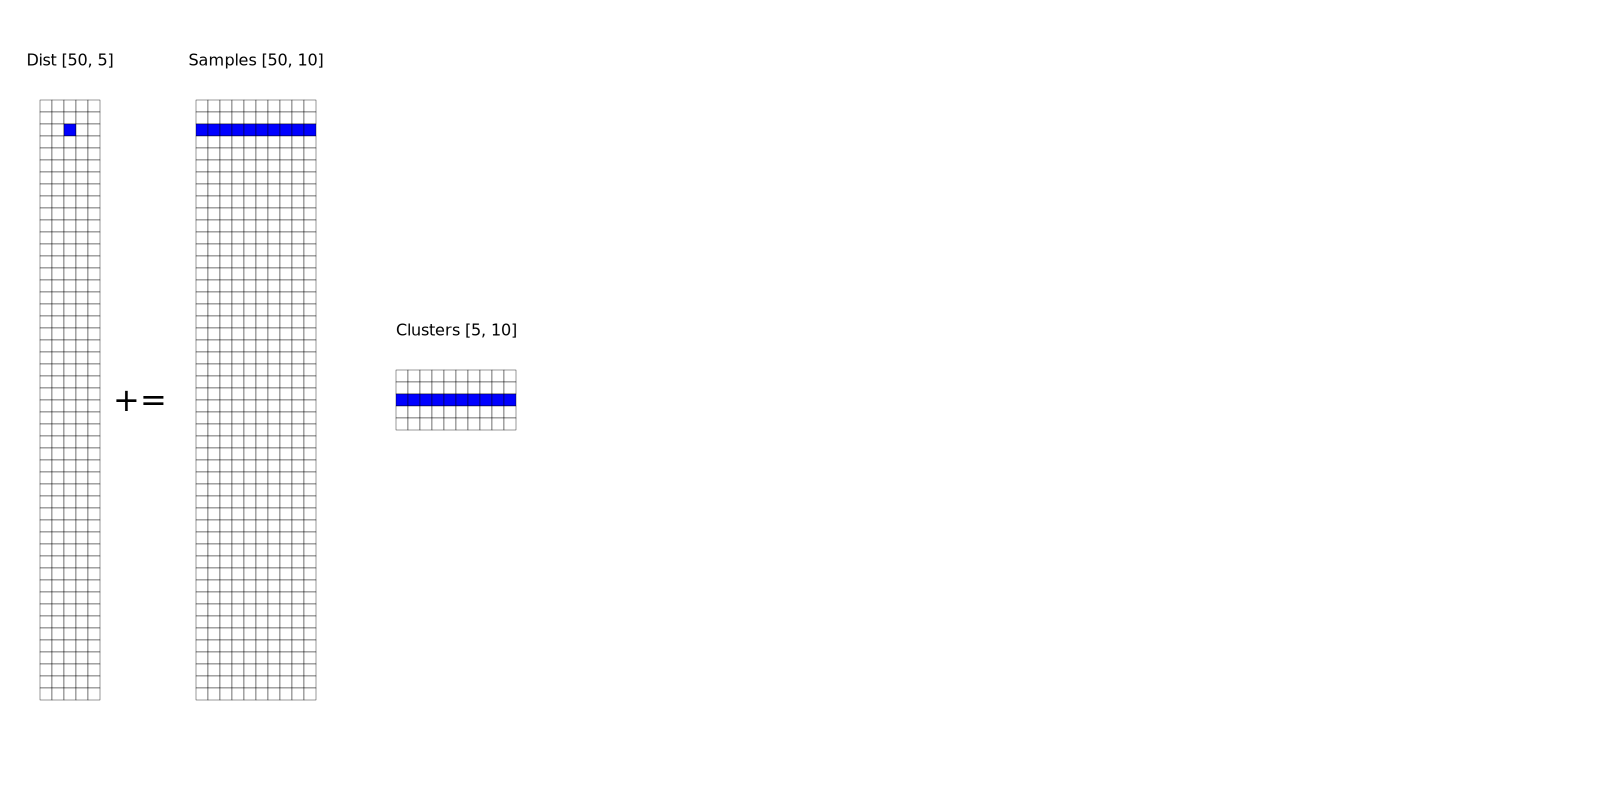

In [ ]:
code = """
# Distance computation
Dist[j,k]+=(Samples[j,l]-Clusters[k,l])^2 

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] += ( Dist[j,k] < Min[j] ) * ( Dist[j,k] - Min[j] )
Labels[j] += (Dist[j,k] == Min[j]) * (k - Labels[j])

# # Cluster update
Count[l] += (Labels[j] == l)
Update[l,k] += Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
kmeans_kernel = tc.compile(code)

d = draw.Drawing(400, 200, origin='center')
tc.viz.draw_op(d,
               kmeans_kernel.tensor_expressions[3],
               tensor_shapes={
                   "Samples": torch.Size([50, 10]),
                   "Clusters": torch.Size([5, 10]),
                   "Dist": torch.Size([50, 5]),
               },
               mindex_highlight=(2,2))
d.set_pixel_scale(4)
d


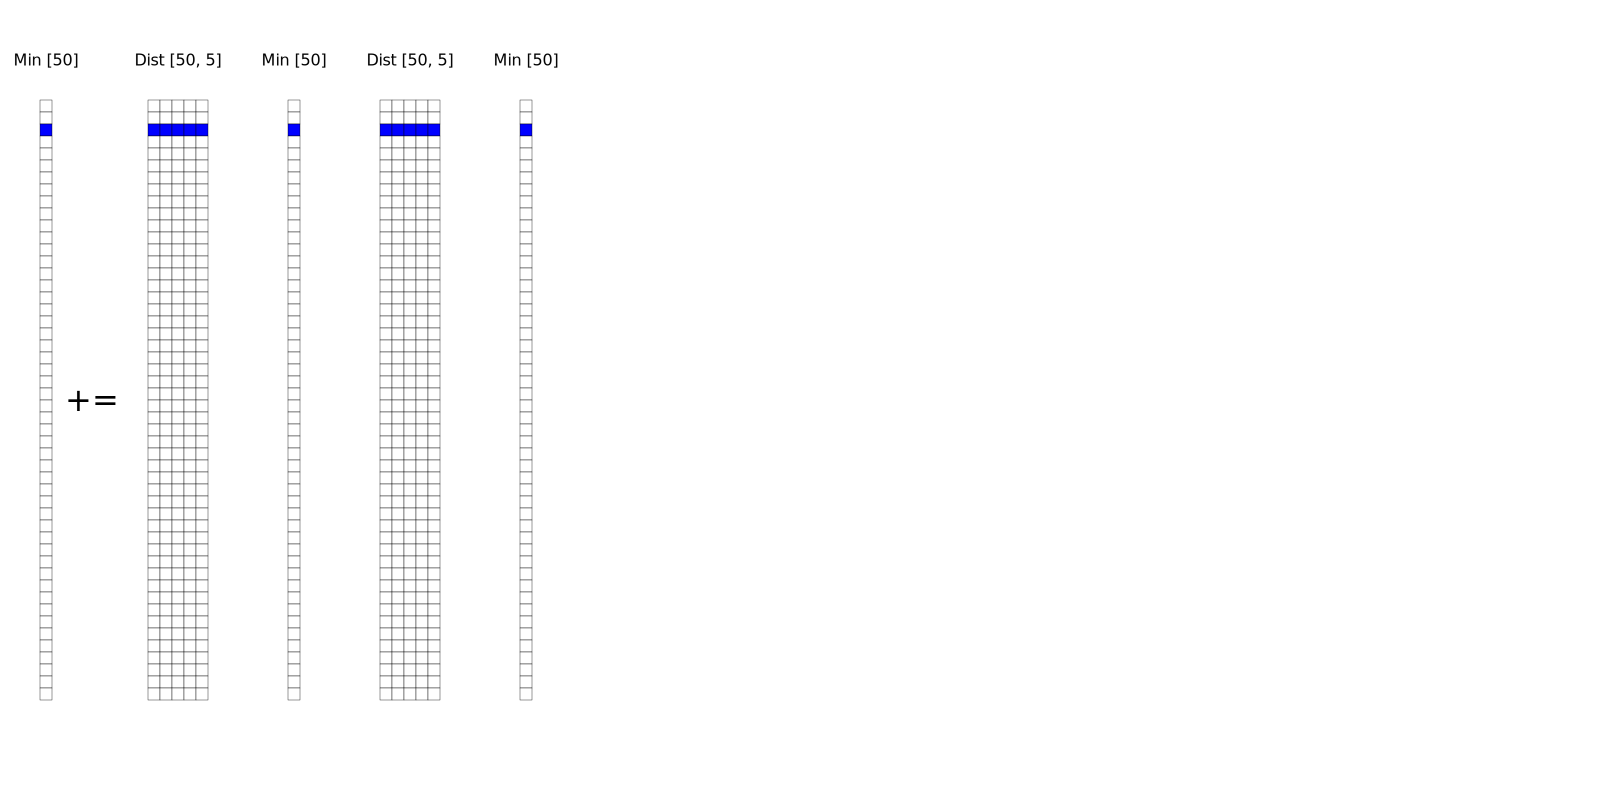

In [ ]:
d = draw.Drawing(400, 200, origin='center')
tc.viz.draw_op(d,
               kmeans_kernel.tensor_expressions[8],
               tensor_shapes={
                   "Min": torch.Size([50]),
                   "Dist": torch.Size([50, 5]),
               },
               mindex_highlight=(2,))
d.set_pixel_scale(4)
d
